In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# projections dataframe (defines images as frontal or lateral)
proj = pd.read_csv('/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv')

# reports dataframe (XML reports in dataframe format)
reports = pd.read_csv('/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv')

# labels for IU-Xray reports
with open('/kaggle/input/labels-14/labels_14.pickle','rb') as myfile:
    labels = pickle.load(myfile)
    

# read example image
img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1000_IM-0003-1001.dcm.png')

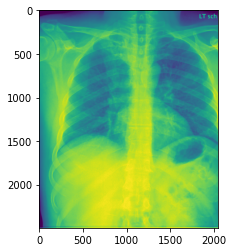

In [24]:
# showing an example image from a patient
plt.imshow(img)
plt.show()

The cells below are combining the iu_xray labels with the projections and report dataframes. This will make visualization easier.

In [25]:
# changing the filenames in projection dataframe copy to match the keys in the labels dataframe
proj1 = proj.copy()
proj1['filename'] = ['CXR'+('-').join(elem.split('-')[0:2]) for elem in proj1.filename]

# adding labels to projection dataframe copy
proj1['label'] = [np.argmax(labels[key]) if key in labels.keys() else None for key in proj1.filename]
proj1.head()

,uid,filename,projection,label
0,1,CXR1_IM-0001,Frontal,NaN
1,1,CXR1_IM-0001,Lateral,NaN
2,2,CXR2_IM-0652,Frontal,13.0
3,2,CXR2_IM-0652,Lateral,13.0
4,3,CXR3_IM-1384,Frontal,NaN


In [26]:
# adding labels to reports dataframe copy
reports1 = reports.copy()
reports1 = reports1.set_index('uid')
reports1['label'] = proj1.groupby('uid').mean()
print(sum(list(reports1.label.value_counts())))
reports1.head()

2954


,MeSH,Problems,image,indication,comparison,findings,impression,label
uid,,,,,,,,
1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,NaN
2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,13.0
3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p...",NaN
4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,2.0
5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,13.0


In [27]:
# the only UID (label key) missing from the projection/reports dataframe
[key for key in labels.keys() if key not in list(proj1.filename)]

['CXR1_1_IM-0001']

Patient 343
label: 4


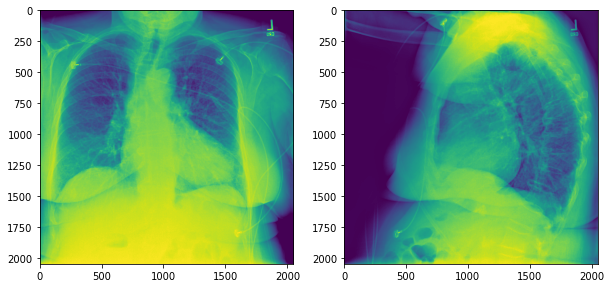

MeSH: Consolidation/lung;Bone Diseases, Metabolic;Airspace Disease/lung;Pulmonary Congestion/mild


In [28]:
idx, cntr = 30, 0 # index is based on the index of the label keys
print('Patient', list(proj1[proj1.filename==list(labels.keys())[idx]].uid)[0])
print('label:',np.argmax(labels[list(labels.keys())[idx]]))
idxs = list(proj1[proj1.filename==list(labels.keys())[idx]].index)
img_names = list(proj.iloc[idxs].filename)
fig, axes = plt.subplots(1,len(img_names), figsize=(5*len(img_names),5))
for img in img_names:
    disp_img = mpimg.imread('/kaggle/input/chest-xrays-indiana-university/images/images_normalized/'+img)
    axes[cntr].imshow(disp_img)
    cntr+=1
plt.show()
print('MeSH:', reports[reports.uid==proj.iloc[idxs].uid.values[0]].MeSH.values[0])

# of classes: (14,)
# of samples: 2955 



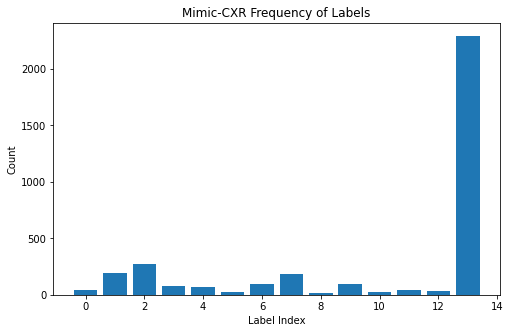

% of data with 14th label: 0.6640602374746597


In [29]:
print('# of classes:',list(labels.values())[0].shape)
# There appears to be 14 classes

print('# of samples:',len(list(labels.keys())),'\n')
# Nearly 3000 labels

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(range(0, 14), sum(list(labels.values())))
plt.title('Mimic-CXR Frequency of Labels')
plt.ylabel('Count')
plt.xlabel('Label Index')
plt.show()

print('% of data with 14th label:',sum(list(labels.values()))[-1]/sum(sum(list(labels.values()))))

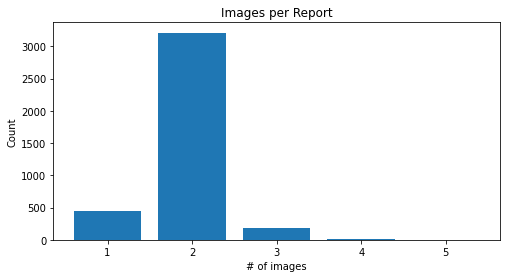

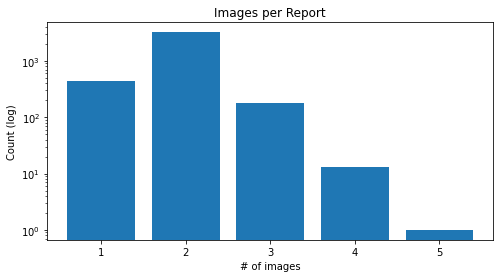

In [30]:
img_per_rep = proj.groupby('uid').count().filename.value_counts()
plt.figure(figsize=(8,4))
plt.bar(img_per_rep.keys(), img_per_rep.values)
plt.title('Images per Report')
plt.ylabel('Count')
plt.xlabel('# of images')
plt.show()

plt.figure(figsize=(8,4))
plt.bar(img_per_rep.keys(), img_per_rep.values)
plt.title('Images per Report')
plt.yscale('log')
plt.ylabel('Count (log)')
plt.xlabel('# of images')
plt.show()